In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/loan_approval_dataset.csv')
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
df.isnull().sum().sum()

np.int64(0)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [7]:
# Remove spaces from column names
df.columns = df.columns.str.strip()
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [8]:
catigorical_cols = [col for col in df.columns if df[col].dtype == 'O']
for col in catigorical_cols:
    print(f'{col} : {df[col].unique()}')

education : [' Graduate' ' Not Graduate']
self_employed : [' No' ' Yes']
loan_status : [' Approved' ' Rejected']


In [9]:
for col in catigorical_cols:
  print(df[col].value_counts()/len(df)*100)
  print()

education
Graduate        50.222535
Not Graduate    49.777465
Name: count, dtype: float64

self_employed
Yes    50.363083
No     49.636917
Name: count, dtype: float64

loan_status
Approved    62.215976
Rejected    37.784024
Name: count, dtype: float64



# **EDA**

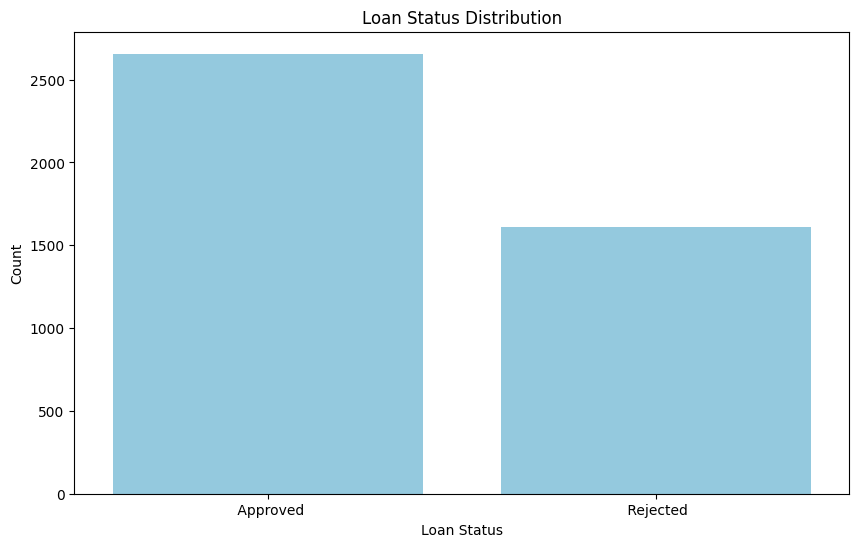

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_status', data=df, color='skyblue')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

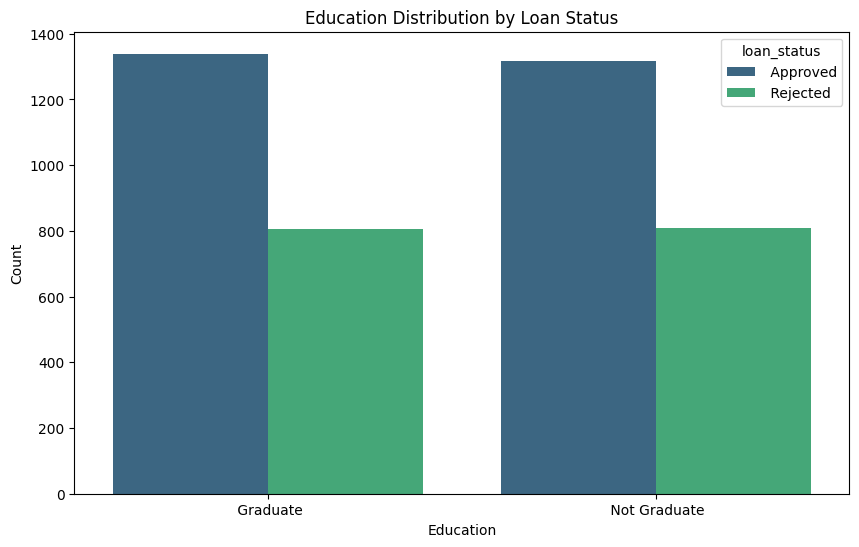

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=df, hue='loan_status', palette='viridis')
plt.title('Education Distribution by Loan Status')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

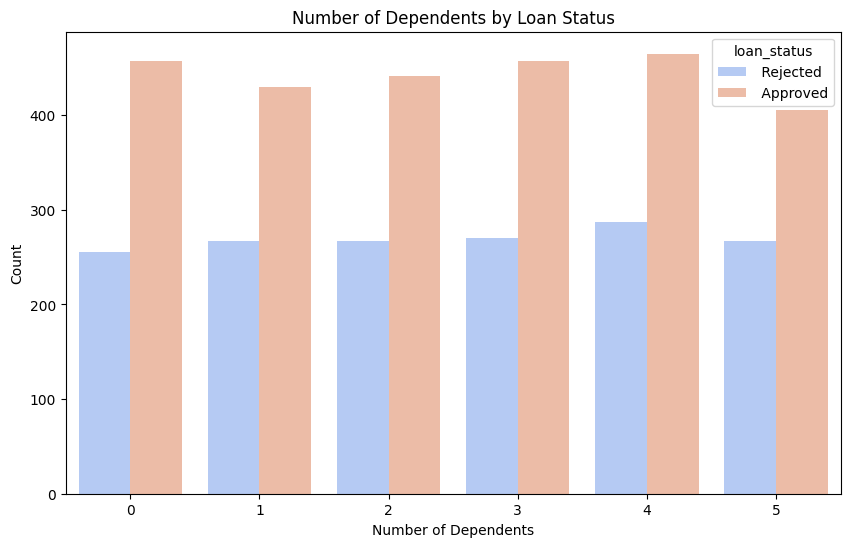

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='no_of_dependents', data=df, hue='loan_status', palette='coolwarm')
plt.title('Number of Dependents by Loan Status')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.show()

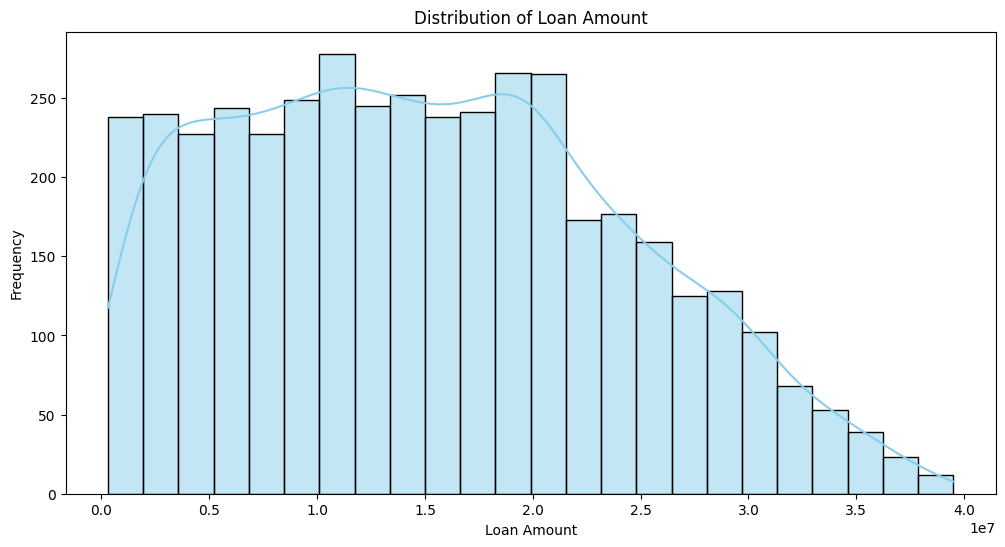

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(df['loan_amount'], kde=True, color='skyblue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

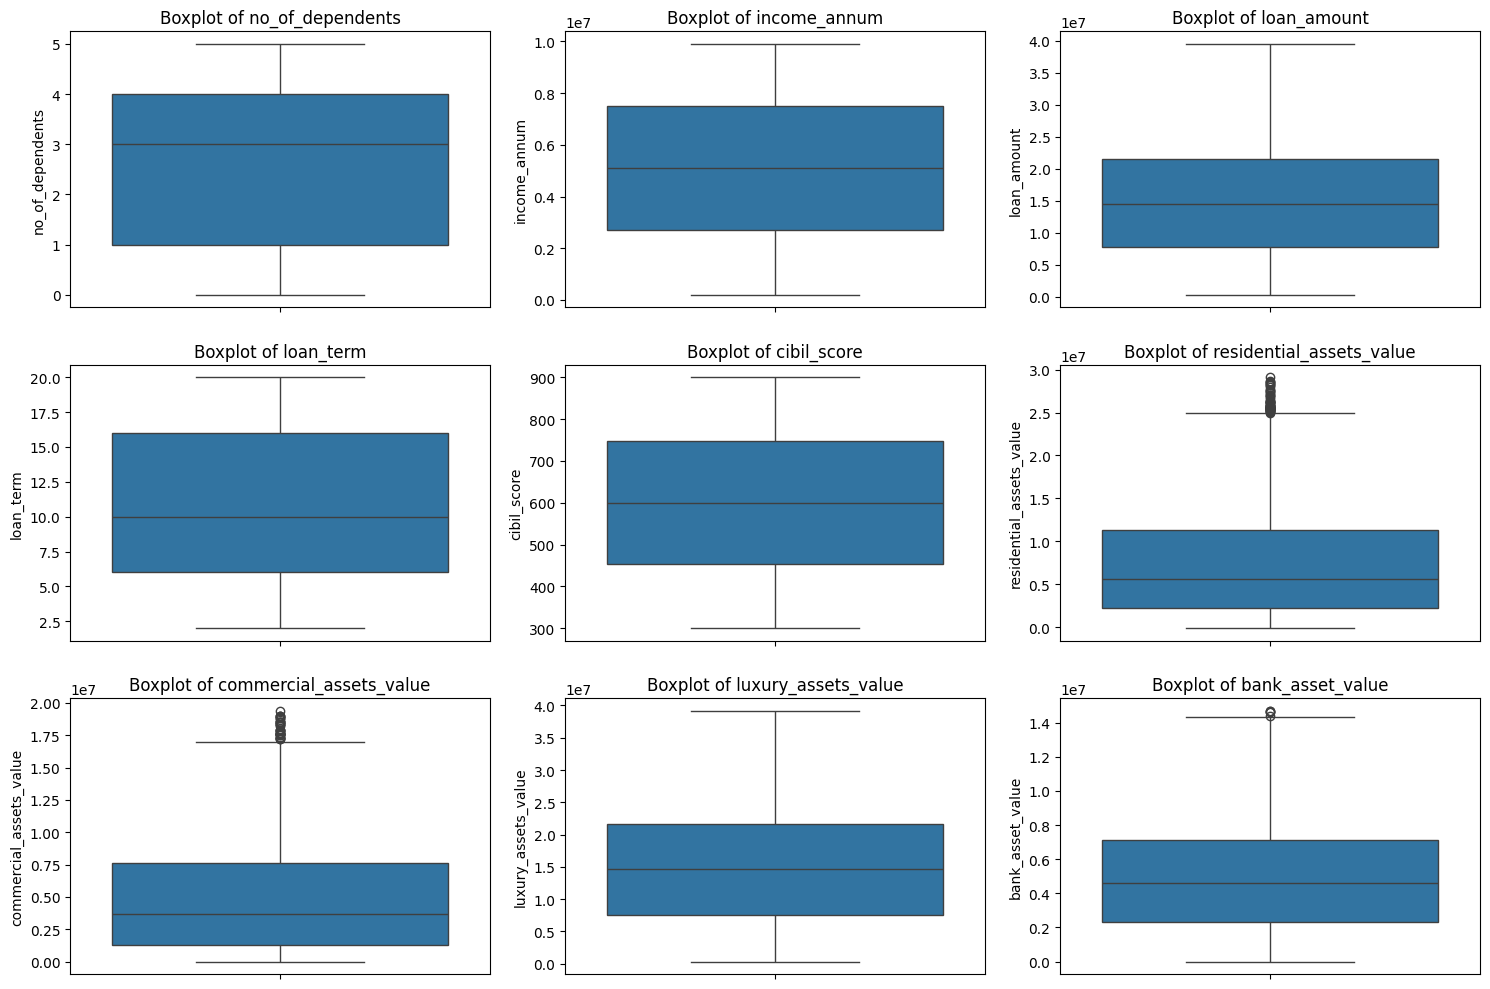

In [14]:
numerical_cols = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [15]:
def check_balance(y):
    counts = y.value_counts()
    total = len(y)
    print("Class distribution:")
    print(counts)
    print("\nClass percentages:")
    print((counts / total * 100).round(2).astype(str) + '%')

    # Rule of thumb: if one class < 40% or > 60%, it's imbalanced
    ratio = counts.min() / counts.max()
    if ratio < 0.8:
        print("\n The dataset is imbalanced.")
    else:
        print("\n The dataset is relatively balanced.")

check_balance(df['loan_status'])

Class distribution:
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

Class percentages:
loan_status
Approved    62.22%
Rejected    37.78%
Name: count, dtype: object

 The dataset is imbalanced.


In [16]:
df = df.drop('loan_id', axis=1)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# **Using LabelEncoder**

In [17]:
le = LabelEncoder()
for col in catigorical_cols:
  df[col] = le.fit_transform(df[col])

df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


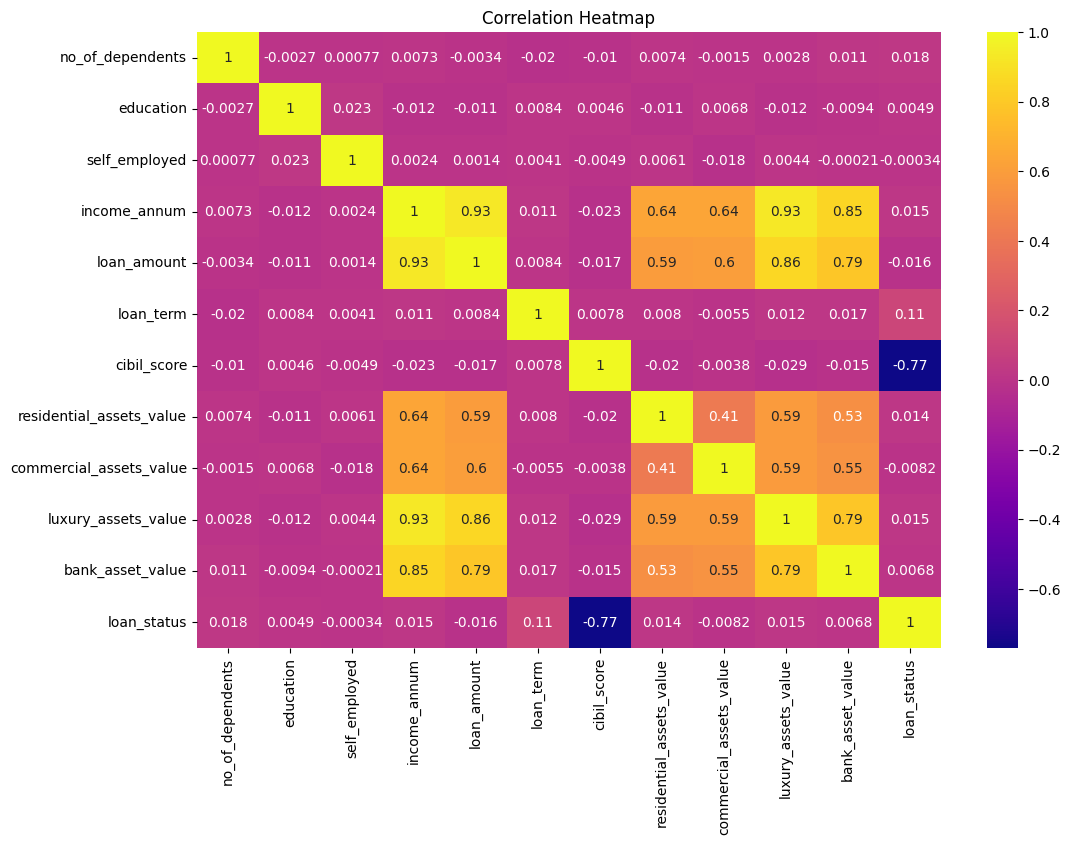

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'plasma')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
df['debt_to_income'] = df['loan_amount'] / df['income_annum']
df= df.drop(columns=['loan_amount','income_annum'])

<Axes: >

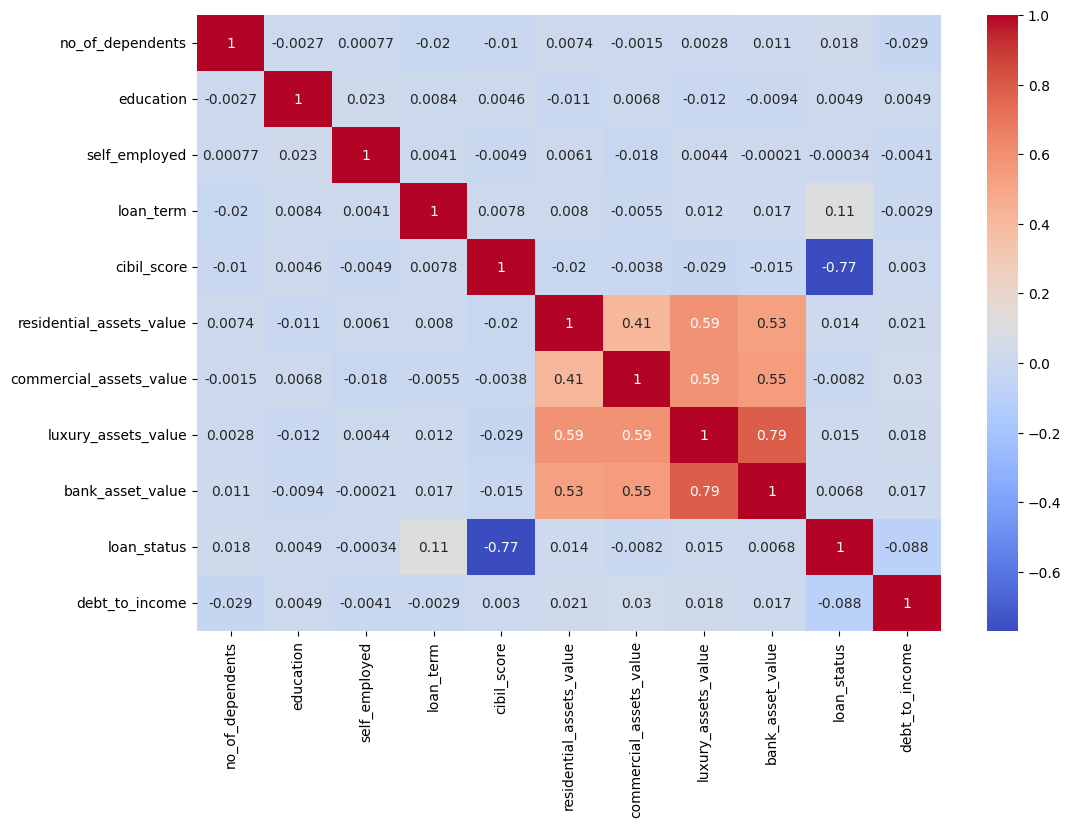

In [20]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# **Scaling by Using [MinMaxScaler]**

In [21]:
numerical_col = df.select_dtypes(include=['int64','float64']).columns
scaler = MinMaxScaler()
df[numerical_col] = scaler.fit_transform(df[numerical_col])
df.head()

,no_of_dependents,education,self_employed,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,debt_to_income
0,0.4,0.0,0.0,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,0.0,0.645833
1,0.0,1.0,1.0,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,1.0,0.590244
2,0.6,0.0,0.0,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,1.0,0.705495
3,0.6,0.0,0.0,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,1.0,0.897561
4,1.0,1.0,1.0,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,1.0,0.387755


# **Separate and Split data**

In [22]:
#Separate
X = df.drop(columns=['loan_status'])
y = df['loan_status']

#Splitting
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3415, 10)
(854, 10)
(3415,)
(854,)


# **After Splitting Data Using Smote Method To Balance Data**

In [23]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Before SMOTE
print("Before SMOTE class distribution:", Counter(y_train))

# Create SMOTE instance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(x_train, y_train)

# After SMOTE
print("After SMOTE class distribution:", Counter(y_train_res))

Before SMOTE class distribution: Counter({0.0: 2120, 1.0: 1295})
After SMOTE class distribution: Counter({0.0: 2120, 1.0: 2120})


# **LogisticRegression Algorithm**

In [24]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000)

In [25]:
cv_scores = cross_val_score(lr_model, X_train_res, y_train_res, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean(),'\n')

# Train model on full training data
lr_model.fit(X_train_res, y_train_res)

# Evaluate on test data
preds = lr_model.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, preds))

Cross-validation scores: [0.9245283  0.90801887 0.9375     0.94811321 0.94457547]
Mean CV accuracy: 0.9325471698113208 

Test Accuracy: 0.9133489461358314


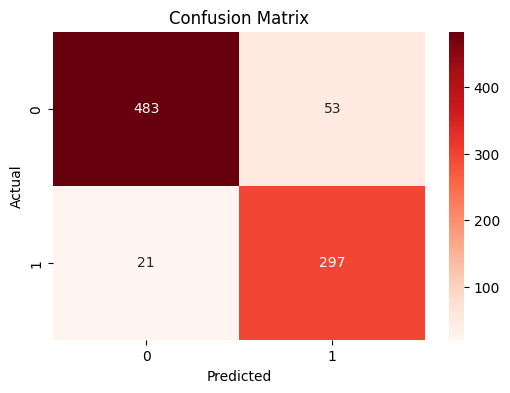


              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       536
         1.0       0.85      0.93      0.89       318

    accuracy                           0.91       854
   macro avg       0.90      0.92      0.91       854
weighted avg       0.92      0.91      0.91       854



In [26]:
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print()
print(classification_report(y_test, preds))

# **DecisionTreeClassifier Algorithm**

In [27]:
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X_train_res, y_train_res)

DecisionTreeClassifier(criterion='entropy')

In [28]:
cv_scores = cross_val_score(dt_model, X_train_res, y_train_res, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean(),'\n')

# Train model on full training data
dt_model.fit(X_train_res, y_train_res)

# Evaluate on test data
predd = dt_model.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, predd))

Cross-validation scores: [0.99292453 0.99056604 0.99410377 0.99174528 0.98938679]
Mean CV accuracy: 0.991745283018868 

Test Accuracy: 0.9964871194379391


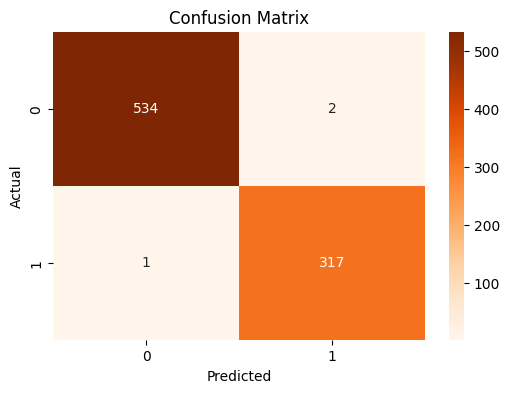


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       536
         1.0       0.99      1.00      1.00       318

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854



In [29]:
cm = confusion_matrix(y_test, predd)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print()
print(classification_report(y_test, predd))

# **RandomForestClassifier Algorithm**

In [30]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [31]:
cv_scores = cross_val_score(rf_model, X_train_res, y_train_res, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean(),'\n')

# Train model on full training data
dt_model.fit(X_train_res, y_train_res)

# Evaluate on test data
pred = dt_model.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, pred))

Cross-validation scores: [0.99528302 0.99056604 0.99528302 0.99764151 0.99410377]
Mean CV accuracy: 0.9945754716981131 

Test Accuracy: 0.9941451990632318


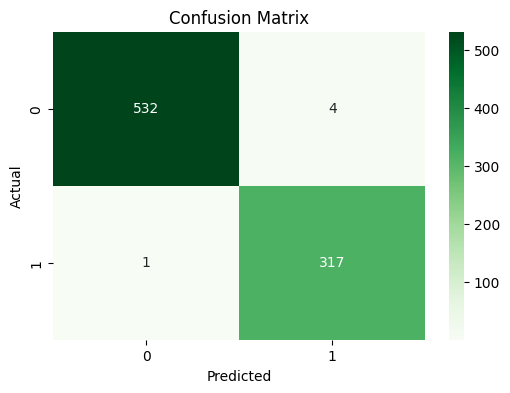


              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       536
         1.0       0.99      1.00      0.99       318

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854



In [32]:
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print()
print(classification_report(y_test, pred))

# **Comparison Between DecisionTree and LogisticRegression**

In [33]:
def get_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred)
    }

# --- Store results ---
results = pd.DataFrame({
    "Logistic Regression": get_metrics(y_test, preds),
    "Decision Tree": get_metrics(y_test, predd)
})

print("\nModel Comparison:")
print(results.round(4))


Model Comparison:
           Logistic Regression  Decision Tree
Accuracy                0.9133         0.9965
Precision               0.8486         0.9937
Recall                  0.9340         0.9969
F1-Score                0.8892         0.9953
